In [1]:
import pandas as pd
# 读取处理后的data和sessions文件
data = pd.read_csv('data.csv')
sessions = pd.read_csv('sessions.csv')
# 通过id合并data，sessions
df = pd.merge(data,sessions,on = 'id',how = 'left')
# 删除多余列，并处理异常值
df.drop(['Unnamed: 0_x','id'],axis = 1,inplace = True)
df.fillna(-2, inplace = True)
# 获取train的最大行数，为后面分割做准备
train = pd.read_csv('train_users_2.csv')
train_rows = train.shape[0]
# 提取标签（预测值）
labels = train['country_destination']
# 标记预测值
from sklearn.preprocessing import LabelEncoder
l_e = LabelEncoder()
encode_label = l_e.fit_transform(labels.values)

Xtrain = df.iloc[:train_rows, :]
Xtest = df.iloc[train_rows:, :]
Ytrain = encode_label

In [50]:
labels.head()

0      NDF
1      NDF
2       US
3    other
4       US
Name: country_destination, dtype: object

In [2]:
from feature_selector import FeatureSelector
# Features are in train and labels are in train_labels
fs = FeatureSelector(data = Xtrain, labels = Ytrain)

In [3]:
# 查看缺失值达到60%的特征
fs.identify_missing(missing_threshold = 0.6)

0 features with greater than 0.60 missing values.



141 features with a correlation magnitude greater than 0.98.



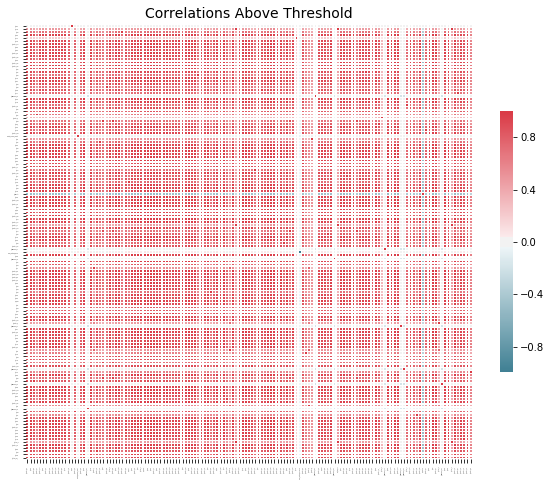

In [4]:
# 查看共线性特征
fs.identify_collinear(correlation_threshold = 0.98)
fs.plot_collinear()

In [5]:
# 查看零重要程度特征
fs.identify_zero_importance(task = 'classification',
 eval_metric = 'auc',
 n_iterations = 10,
 early_stopping = True)
# list of zero importance features
zero_importance_features = fs.ops['zero_importance']
zero_importance_features

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[5]	valid_0's auc: 0.442747
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 0.348094
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[8]	valid_0's auc: 0.367629
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[2]	valid_0's auc: 0.397878
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[101]	valid_0's auc: 0.352253
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[2]	valid_0's auc: 0.376851
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[8]	valid_0's auc: 0.398978
Training until validation scores don't improve for 100 rounds.
Early stopping, bes

['act_detail_109',
 'first_browser_nan',
 'signup_flow_15.0',
 'first_browser_SiteKiosk',
 'act_detail_90',
 'act_detail_94',
 'first_browser_wOSBrowser',
 'act_detail_107',
 'act_detail_106',
 'act_detail_103',
 'first_browser_Sogou Explorer',
 'tfa_weekday_4.1',
 'first_browser_Yandex.Browser',
 'act_detail_99',
 'first_browser_SlimBrowser',
 'act_detail_97',
 'act_detail_96',
 'signup_flow_16.0',
 'act_detail_101',
 'act_detail_144',
 'act_detail_112',
 'act_detail_113',
 'act_detail_141',
 'act_detail_140',
 'signup_flow_14.0',
 'signup_flow_10.0',
 'act_type_3',
 'act_detail_137',
 'act_detail_88',
 'act_type_6',
 'act_type_7',
 'act_type_9',
 'first_browser_Stainless',
 'act_detail_131',
 'signup_flow_4.0',
 'signup_method_nan',
 'signup_method_weibo',
 'gender_nan',
 'act_detail_125',
 'dev_type_11',
 'act_detail_124',
 'act_detail_123',
 'act_detail_122',
 'act_detail_121',
 'act_detail_120',
 'act_detail_118',
 'act_detail_116',
 'first_browser_TenFourFox',
 'act_detail_115',


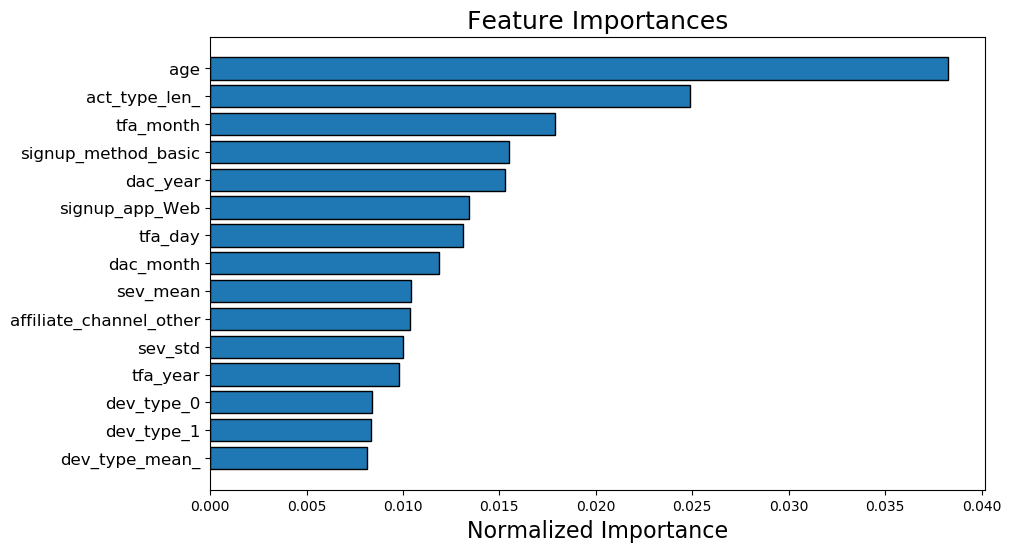

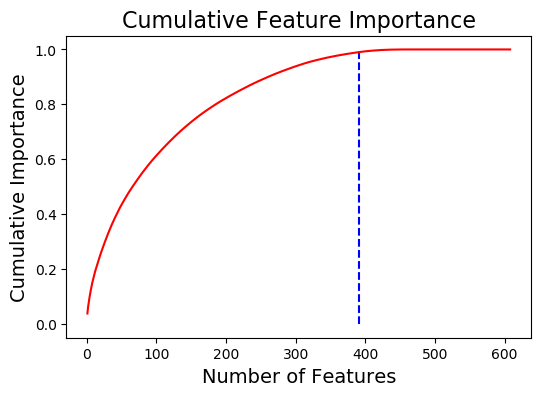

391 features required for 0.99 of cumulative importance


In [6]:
# plot the feature importances
fs.plot_feature_importances(threshold = 0.99, plot_n = 15)

In [7]:
# 查看低重要程度特征
fs.identify_low_importance(cumulative_importance = 0.99)

390 features required for cumulative importance of 0.99 after one hot encoding.
218 features do not contribute to cumulative importance of 0.99.



In [8]:
train_removed_all = fs.remove(methods = 'all', keep_one_hot=True)

['missing', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 259 features.


In [9]:
train_removed_all.shape

(213451, 349)

In [53]:
#保存新数据
train_removed_all.to_csv('train_removed_all.csv')
labels.to_csv('Y.csv',header=['type'])